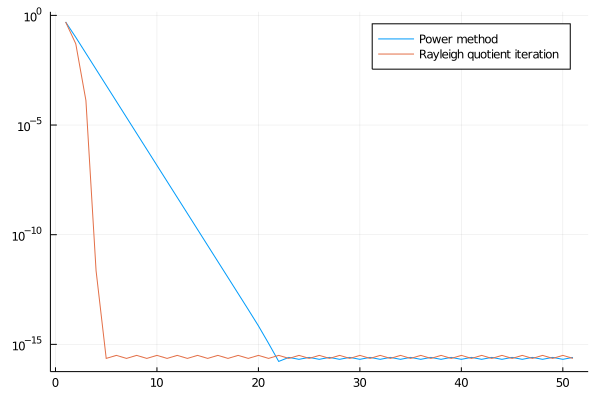

In [1]:
using LinearAlgebra
A = [ 1 2 3; 2 2 2; 3 2 9 ]';

function r(x, A)
    r_x = x'*A*x
    r_x = r_x / (x'*x)
end

EIG = eigen(A);
eigvec = EIG.vectors;
eigval = EIG.values;

eigvec = eigvec[:, sortperm(abs.(eigval), rev=true)];
eigvec_1 = eigvec[:,1]; eigvec_2 = eigvec[:,2]; eigvec_3 = eigvec[:,3];
eigval = sort(abs.(eigval), rev=true);

x0 = [1 1 1]';
x0 = x0 / norm(x0);

y0 = copy(x0);
mu0 = 10;

#a)
N = 50

error_power = [abs(norm(x0.*sign(x0[1])-eigvec_1.*sign(eigvec_1[1])))]
error_rayleigh = [abs(norm(y0.*sign(y0[1])-eigvec_1.*sign(eigvec_1[1])))]

for i=1:N 
    x0 = A*x0;
    x0 = x0 / norm(x0);
    error_power = append!(error_power, abs(norm(x0.*sign(x0[1])-eigvec_1.*sign(eigvec_1[1]))))
    
    y0 = (A - mu0[1]*I(3)) \ y0
    y0 = y0 / norm(y0);
    mu0 = y0'*A*y0;
    error_rayleigh = append!(error_rayleigh, abs(norm(y0.*sign(y0[1])-eigvec_1.*sign(eigvec_1[1]))))
end

using Plots 
plot(error_power, yaxis=:log, label="Power method")
plot!(error_rayleigh, yaxis=:log, label="Rayleigh quotient iteration", fmt = :png)

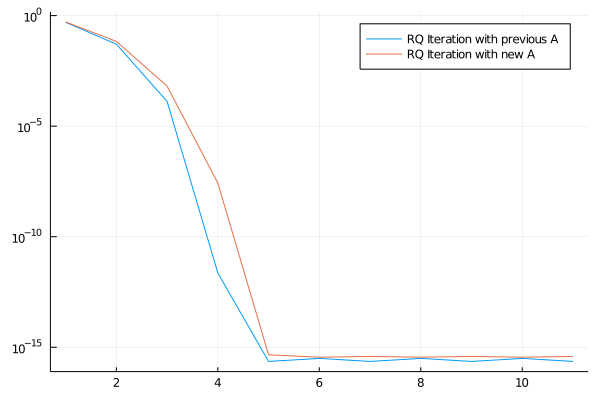

In [2]:
A[1,3] = 4
A = [ 1 2 4; 2 2 2; 3 2 9 ]';

EIG = eigen(A);
eigvec = EIG.vectors; eigval = EIG.values;

eigvec = eigvec[:, sortperm(abs.(eigval), rev=true)];
eigvec_1 = eigvec[:,1]; eigvec_2 = eigvec[:,2]; eigvec_3 = eigvec[:,3];
eigval = sort(abs.(eigval), rev=true);

x0 = [1 1 1]';
y0 = x0 / norm(x0);
mu0 = 10;

N = 10
error_rayleigh_new = [abs(norm(y0.*sign(y0[1])-eigvec_1.*sign(eigvec_1[1])))]

for i=1:N
    y0 = (A - mu0[1]*I(3)) \ y0
    y0 = y0 / norm(y0);
    mu0 = y0'*A*y0;
    error_rayleigh_new = append!(error_rayleigh_new, abs(norm(y0.*sign(y0[1])-eigvec_1.*sign(eigvec_1[1]))))
end

using Plots 
plot(error_rayleigh[1:length(error_rayleigh_new)], yaxis=:log, label="RQ Iteration with previous A")
plot!(error_rayleigh_new, yaxis=:log, label="RQ Iteration with new A", fmt = :png)